In [ ]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Input, Embedding, LSTM, Dense, Lambda, GaussianNoise, concatenate
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Merge
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import MaxPooling2D, Dropout, Dense, Flatten, Activation, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy as logloss
from tensorflow.keras.metrics import categorical_accuracy
import matplotlib.pyplot as plt



#from tensorflow.keras import models
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D
#from tensorflow.keras.layers import MaxPooling2D
#from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Dropout

#from tensorflow.keras.layers import Activation

#from tensorflow.keras.datasets import mnist
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.layers import Activation, Input, Embedding, LSTM, Dense, Lambda, GaussianNoise, concatenate

In [ ]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# convert y_train and y_test to categorical binary values 
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the values
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:

from tensorflow.keras import optimizers
input_shape = (28, 28, 1) # Input shape of each image


dropout = 0.2

teacher = Sequential()

teacher.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', strides=1,
                     input_shape=X_train.shape[1:], activation='relu'))
teacher.add(Dropout(dropout))
teacher.add(MaxPooling2D(pool_size=(2, 2)))
teacher.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', strides=1,
                  input_shape=X_train.shape[1:], activation='relu'))
teacher.add(Dropout(dropout))
teacher.add(MaxPooling2D(pool_size=(2, 2)))

teacher.add(Flatten())
teacher.add(Dense(1024, activation='relu'))
teacher.add(Dropout(dropout))
teacher.add(Dense(512, activation='relu'))
teacher.add(Dropout(dropout))
teacher.add(Dense(10,activation='softmax'))


#teacher.add(Conv2D(32,  kernel_size = 3, activation='relu', input_shape = (32, 32, 3)))
#teacher.add(Dropout(0.2))
#teacher.add(Conv2D(32,  kernel_size = 3, activation='relu',padding= 'same', input_shape = (32, 32, 3)))
#teacher.add(Conv2D(64, kernel_size = 3, strides=1, activation='relu'))
#teacher.add(MaxPooling2D((2, 2)))
#teacher.add(Conv2D(128, kernel_size = 3, strides=1,padding='same', activation='relu'))
#teacher.add(MaxPooling2D((2, 2)))
#teacher.add(Conv2D(64, kernel_size = 3, activation='relu'))
#teacher.add(MaxPooling2D((2, 2)))
#teacher.add(Dropout(0.2))


#teacher.add(Flatten())
#teacher.add(Dense(512, activation = "relu"))
#teacher.add(Dropout(0.2))
#teacher.add(Dense(10, activation = "softmax"))


# Compile the model
#teacher.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])

# Summary of model
#teacher.summary()



#teacher = Sequential()
#teacher.add(Conv2D(32, kernel_size=(3, 3),
#                 activation='relu',
#                 input_shape=input_shape))
#teacher.add(Conv2D(64, (3, 3), activation='relu'))
#teacher.add(MaxPooling2D(pool_size=(2, 2)))
#
#teacher.add(Dropout(0.25)) # For reguralization
#
#teacher.add(Flatten())
#teacher.add(Dense(128, activation='relu'))
#teacher.add(Dropout(0.5)) # For reguralization
#
#teacher.add(Dense(nb_classes, activation = 'softmax'))
adelta = optimizers.Adadelta(lr=0.01)
teacher.compile(loss='categorical_crossentropy',
              optimizer=adelta,
              metrics=['accuracy'])

print(teacher.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [ ]:
epochs = 50
batch_size = 256
teacher.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/50
235/235 [==============================] - 2s 10ms/step - loss: 1.9633 - accuracy: 0.4368 - val_loss: 1.4253 - val_accuracy: 0.7913
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.8014 - accuracy: 0.7768 - val_loss: 0.5961 - val_accuracy: 0.8808
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.4848 - accuracy: 0.8540 - val_loss: 0.4388 - val_accuracy: 0.9061
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3915 - accuracy: 0.8829 - val_loss: 0.3730 - val_accuracy: 0.9169
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3393 - accuracy: 0.8990 - val_loss: 0.3215 - val_accuracy: 0.9263
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3045 - accuracy: 0.9085 - val_loss: 0.2932 - val_accuracy: 0.9336
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2743 - accuracy: 0.9172 - val_loss: 0.2659 - val_accuracy: 0.9395
Epoch

In [ ]:
student = Sequential()
student.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
student.add(Flatten())
student.add(Dense(32, activation='relu'))
student.add(Dropout(0.2))
student.add(Dense(nb_classes, activation = 'softmax'))

#sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
student.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

student.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                692256    
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 692,906
Trainable params: 692,906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import models
temp = 7

teacher_WO_Softmax = models.Model(teacher.input, teacher.get_layer('dense_2').output)

[[0.08538848 0.08538684 0.08547545 0.08559038 0.08538533 0.08538882
  0.08538505 0.23120439 0.08539137 0.0854039 ]]


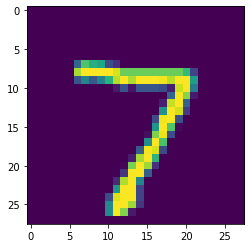

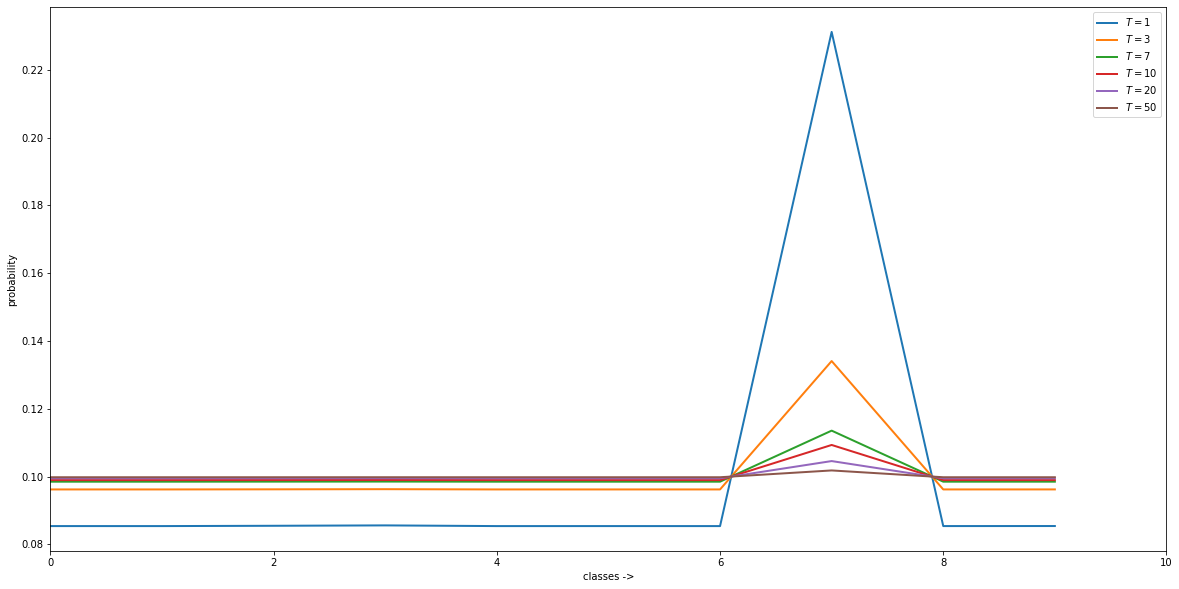

In [ ]:
import numpy as np

def softmax(x):
    return np.exp(x)/(np.exp(x).sum())


import matplotlib.pyplot as plt

intermediate_output = teacher_WO_Softmax.predict(X_test[0].reshape(1,28,28,1))
print(softmax(intermediate_output))

pixels = X_test[0]
pixels = pixels.reshape((28, 28))
plt.imshow(pixels)
plt.show()

# logits for the first number in test dataset
x = intermediate_output[0]
plt.figure(figsize=(20, 10));

temperature = [1,3,7,10,20,50]

for temp in temperature:
    plt.plot((softmax(x/temp)), label='$T='+str(temp)+'$', linewidth=2);
    plt.legend();
plt.xlabel('classes ->');
plt.ylabel('probability');
plt.xlim([0, 10]);
plt.show()

In [ ]:
print(intermediate_output[0])

[4.0723869e-05 2.1455797e-05 1.0587280e-03 2.4024153e-03 3.8516910e-06
 4.4729622e-05 4.4485012e-07 9.9613166e-01 7.4572163e-05 2.2129522e-04]


In [ ]:
teacher_train_logits = teacher_WO_Softmax.predict(X_train)
teacher_test_logits = teacher_WO_Softmax.predict(X_test) # This model directly gives the logits ( see the teacher_WO_softmax model above)

# Perform a manual softmax at raised temperature
train_logits_T = teacher_train_logits/temp
test_logits_T = teacher_test_logits / temp 

Y_train_soft = softmax(train_logits_T)
Y_test_soft = softmax(test_logits_T)

# Concatenate so that this becomes a 10 + 10 dimensional vector
Y_train_new = np.concatenate([Y_train, Y_train_soft], axis=1)
Y_test_new =  np.concatenate([Y_test, Y_test_soft], axis =1)

In [ ]:
Y_train_new.shape

(60000, 20)

In [ ]:
student.layers.pop()

# Now collect the logits from the last layer
logits = student.layers[-1].output # This is going to be a tensor. And hence it needs to pass through a Activation layer
probs = Activation('softmax')(logits)

# softed probabilities at raised temperature
logits_T = Lambda(lambda x: x / temp)(logits)
probs_T = Activation('softmax')(logits_T)

output = concatenate([probs, probs_T])

# This is our new student model
student = models.Model(student.input, output)

student.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_2_input (InputLayer)     [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 26, 26, 32)   320         conv2d_2_input[0][0]             
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 21632)        0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 32)           692256      flatten_1[0][0]                  
____________________________________________________________________________________________

In [ ]:
def knowledge_distillation_loss(y_true, y_pred, alpha):

    # Extract the one-hot encoded values and the softs separately so that we can create two objective functions
    y_true, y_true_softs = y_true[: , :nb_classes], y_true[: , nb_classes:]
    
    y_pred, y_pred_softs = y_pred[: , :nb_classes], y_pred[: , nb_classes:]
    
    loss = alpha*logloss(y_true,y_pred) + logloss(y_true_softs, y_pred_softs)
    
    return loss

# For testing use regular output probabilities - without temperature
def acc(y_true, y_pred):
    y_true = y_true[:, :nb_classes]
    y_pred = y_pred[:, :nb_classes]
    return categorical_accuracy(y_true, y_pred)

student.compile(
    #optimizer=optimizers.SGD(lr=1e-1, momentum=0.9, nesterov=True),
    optimizer='adadelta',
    loss=lambda y_true, y_pred: knowledge_distillation_loss(y_true, y_pred, 0.1),
    #loss='categorical_crossentropy',
    metrics=[acc] )

In [ ]:
Y_test_new.shape

(10000, 20)

In [ ]:
student_epochs = 200
from tensorflow.keras.losses import categorical_crossentropy as logloss
from tensorflow.keras.metrics import categorical_accuracy
student.fit(X_train, Y_train_new,
          batch_size=128,
          epochs=student_epochs,
          verbose=1,
          validation_data=(X_test, Y_test_new))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2301 - acc: 0.1575 - val_loss: 0.2303 - val_acc: 0.1748
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2301 - acc: 0.1648 - val_loss: 0.2303 - val_acc: 0.1872
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2301 - acc: 0.1761 - val_loss: 0.2302 - val_acc: 0.1969
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2300 - acc: 0.1879 - val_loss: 0.2302 - val_acc: 0.2108
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2300 - acc: 0.1973 - val_loss: 0.2302 - val_acc: 0.2248
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2300 - acc: 0.2048 - val_loss: 0.2301 - val_acc: 0.2406
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2299 - acc: 0.2181 - val_loss: 0.2301 - val_acc: 0.2547
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

In [ ]:
n_student = Sequential()
n_student.add(Flatten(input_shape=input_shape))
n_student.add(Dense(32, activation='relu'))
n_student.add(Dropout(0.2))
n_student.add(Dense(nb_classes))
n_student.add(Activation('softmax'))

#sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
n_student.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [ ]:
n_student.fit(X_train, Y_train,
          batch_size=256,
          epochs=student_epochs,
          verbose=1,
          validation_data=(X_test, Y_test)) 